In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [4]:
import tensorflow as tf
from tensorflow import keras

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
print(plt)

<module 'matplotlib.pyplot' from '/Users/parkdonghwi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>


In [7]:
fashion_mnist = keras.datasets.fashion_mnist

In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
train_images = train_images / 255.0

In [36]:
test_images = test_images / 255.0

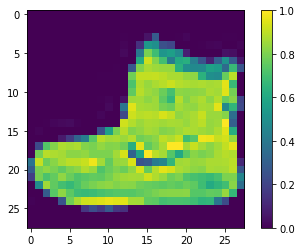

In [39]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

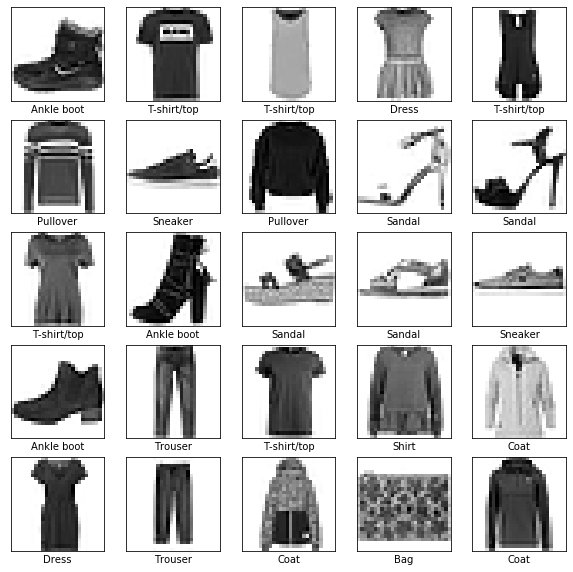

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [45]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [53]:
model.fit(train_images, train_labels, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0271 - accuracy: 0.9906
Epoch 2/5
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0297 - accuracy: 0.9892
Epoch 3/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0282 - accuracy: 0.9894
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0255 - accuracy: 0.9910
Epoch 5/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0328 - accuracy: 0.9880


In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.2341 - accuracy: 0.8889

Test accuracy: 0.8889


In [60]:
predictions = model.predict(test_images)

In [62]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 7.1374563e-27, 0.0000000e+00, 5.7082736e-15,
       0.0000000e+00, 1.0000000e+00], dtype=float32)

In [63]:
np.argmax(predictions[0])

9

In [51]:
test_labels[0]

9

In [75]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color
              )
    

In [76]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

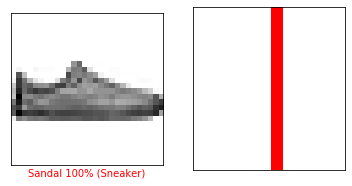

In [78]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

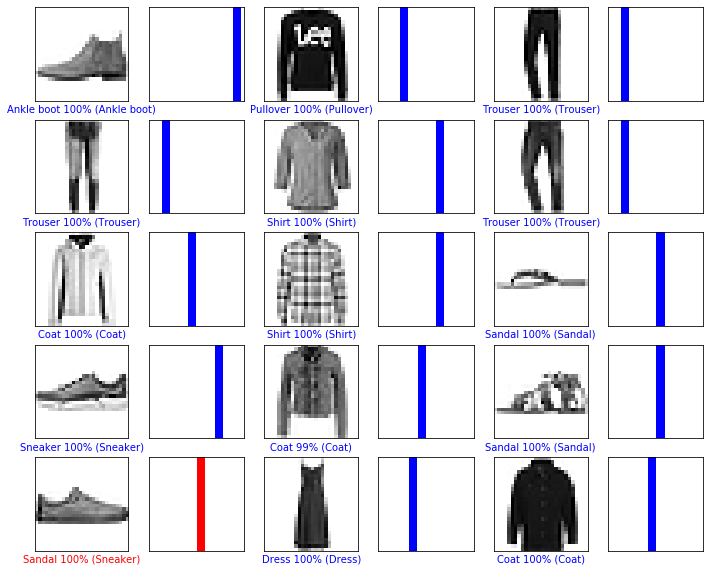

In [79]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [80]:
img = test_images[0]

In [81]:
img.shape

(28, 28)

In [82]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [83]:
predictions_single = model.predict(img)
print(predictions_single)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  7.1374294e-27 0.0000000e+00 5.7082956e-15 0.0000000e+00 1.0000000e+00]]


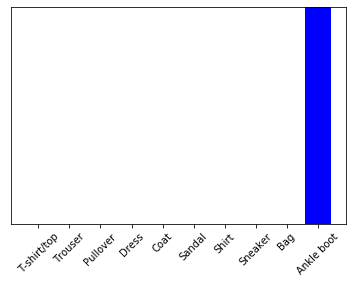

In [84]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [85]:
np.argmax(predictions_single[0])


9